In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes


In [4]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 99 non-null     object
 1   Product                       99 non-null     object
 2   Sub-product                   86 non-null     object
 3   Consumer complaint narrative  16 non-null     object
 4   Company public response       33 non-null     object
 5   Company                       99 non-null     object
 6   State                         98 non-null     object
 7   ZIP code                      89 non-null     object
 8   Submitted via                 99 non-null     object
 9   Company response to consumer  99 non-null     object
 10  Timely response?              99 non-null     object
 11  Consumer disputed?            75 non-null     object
dtypes: object(12)
memory usage: 9.4+ KB


In [6]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [7]:
 df =df.dropna(subset=["State"])


In [8]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    82
Company public response         66
Company                          0
State                            0
ZIP code                         9
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              23
dtype: int64

In [9]:
column_name = 'Sub-product'
replacement_value = 'Not Specified'
df[column_name].fillna(replacement_value, inplace=True)

<ipython-input-9-6fb5ec563155>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name].fillna(replacement_value, inplace=True)


In [10]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                      0
Consumer complaint narrative    82
Company public response         66
Company                          0
State                            0
ZIP code                         9
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              23
dtype: int64

In [11]:
df = df.dropna(subset=['Consumer complaint narrative'])

In [12]:
df['Consumer complaint narrative'].fillna('Not available', inplace=True)


In [13]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                      0
Consumer complaint narrative     0
Company public response          5
Company                          0
State                            0
ZIP code                         6
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              11
dtype: int64

In [14]:
column_name = 'Consumer disputed?'
replacement_value = 'NAN'
df[column_name].fillna(replacement_value, inplace=True)

In [15]:
df.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Consumer complaint narrative    0
Company public response         5
Company                         0
State                           0
ZIP code                        6
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64

In [16]:
column_name = 'Company public response'
replacement_value = 'Not Responed'
df[column_name].fillna(replacement_value, inplace=True)

In [17]:
df.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        6
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64

In [18]:
column_name = 'ZIP code'
replacement_value = '9999'
df[column_name].fillna(replacement_value, inplace=True)

In [19]:
df.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64

**Performing EDA in Data set**

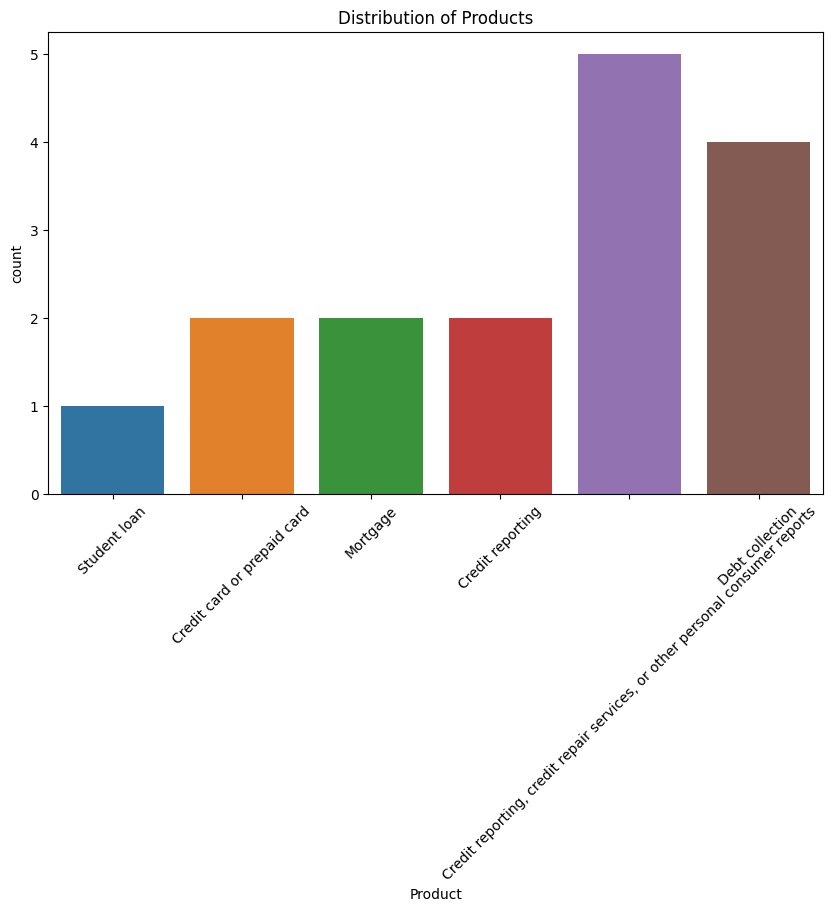

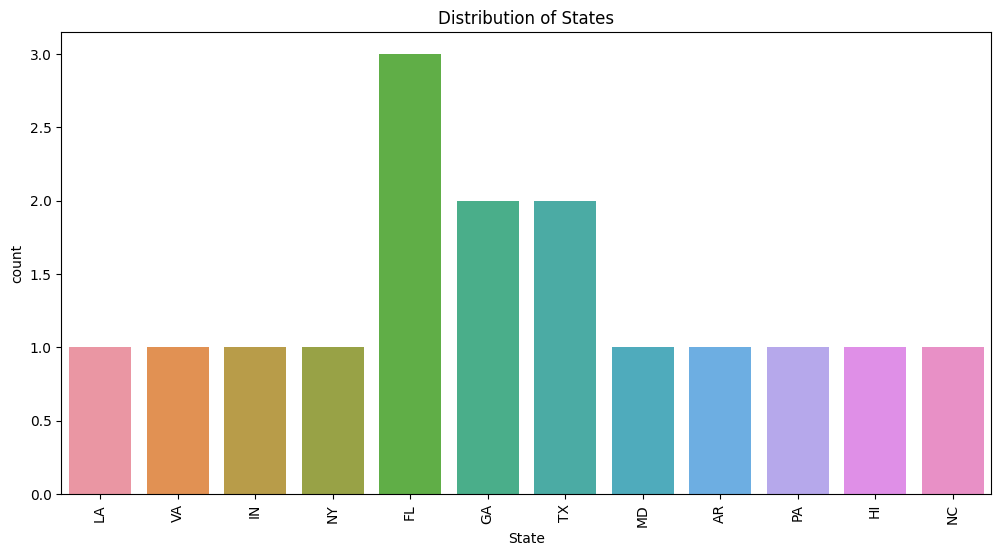

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product')
plt.xticks(rotation=45)
plt.title('Distribution of Products')
plt.show()

# Bar plot for "State"
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='State')
plt.xticks(rotation=90)
plt.title('Distribution of States')
plt.show()

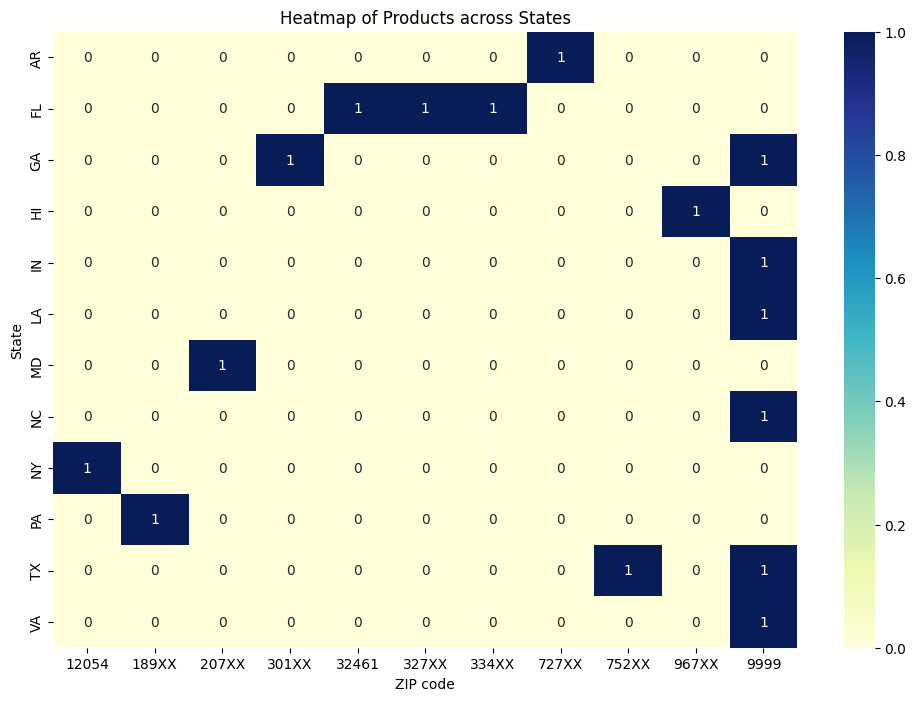

In [21]:
pivot_table = df.pivot_table(index='State', columns='ZIP code', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Products across States')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


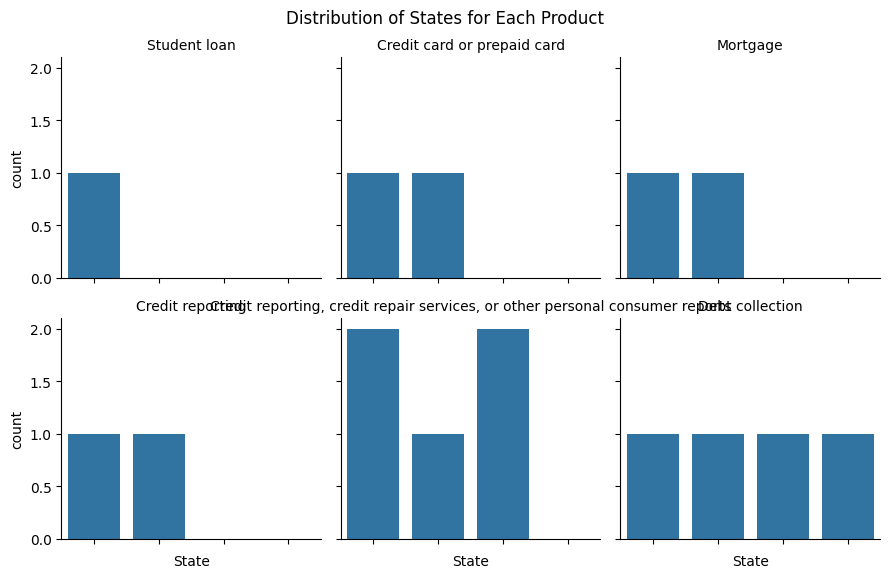

In [22]:
g = sns.FacetGrid(df, col='Product', col_wrap=3)
g.map(sns.countplot, 'State')
g.set_xticklabels(rotation=90)
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of States for Each Product')
plt.show()

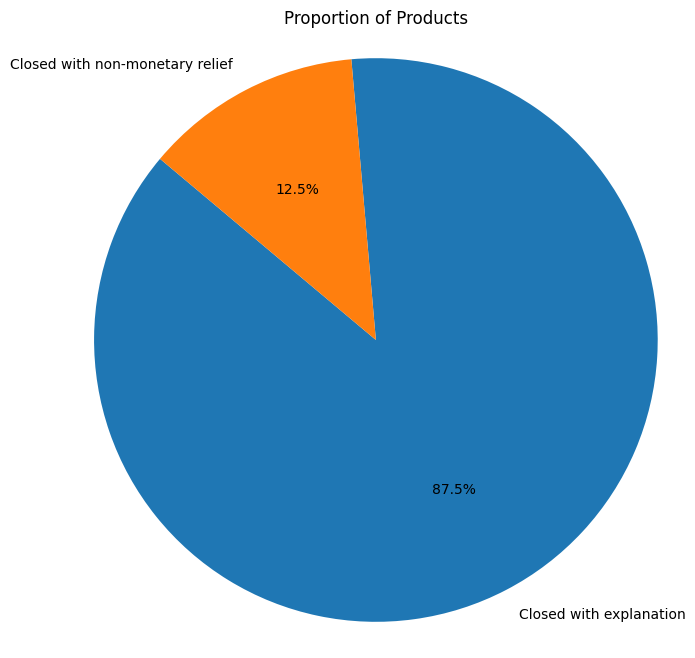

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(df['Company response to consumer'].value_counts(), labels=df['Company response to consumer'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Products')
plt.axis('equal')
plt.show()

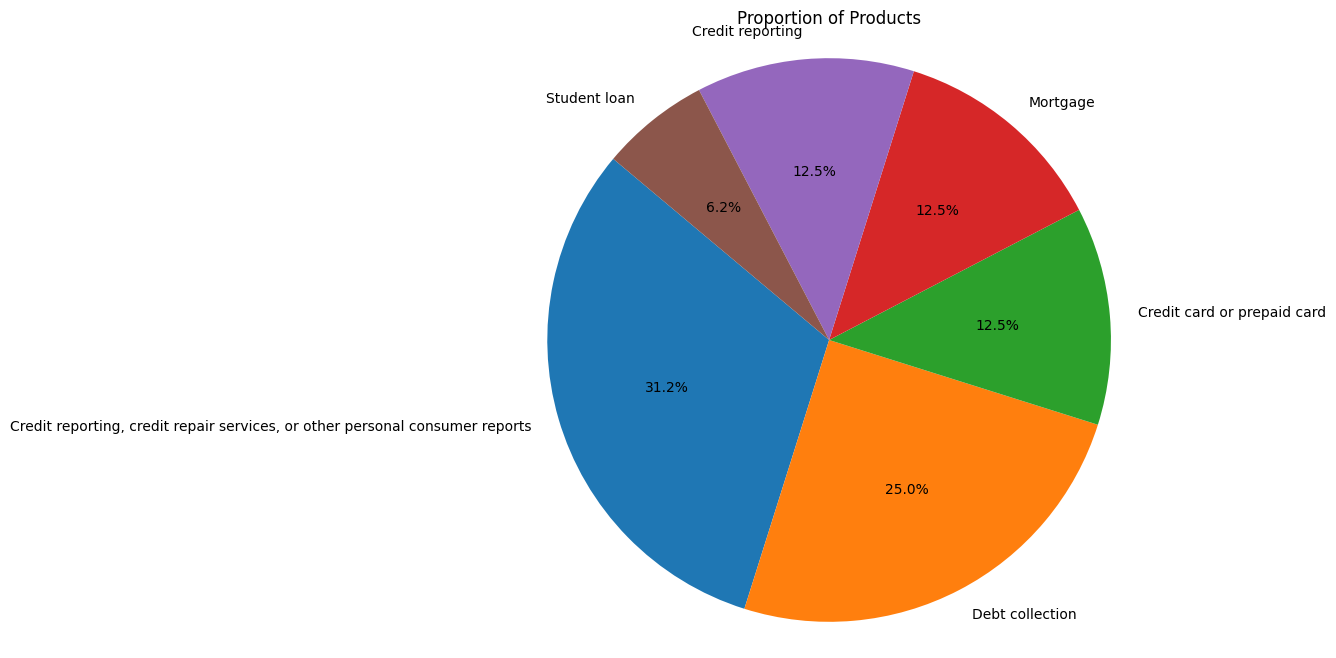

In [24]:
plt.figure(figsize=(8, 8))
plt.pie(df['Product'].value_counts(), labels=df['Product'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Products')
plt.axis('equal')
plt.show()


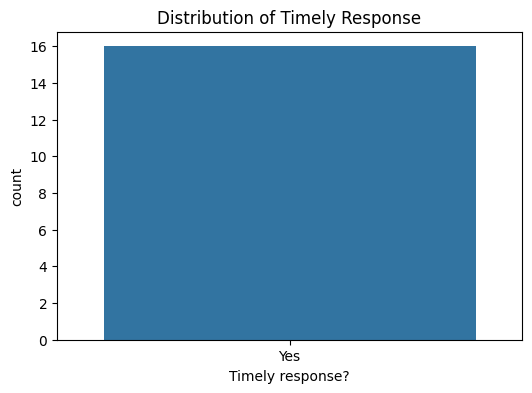

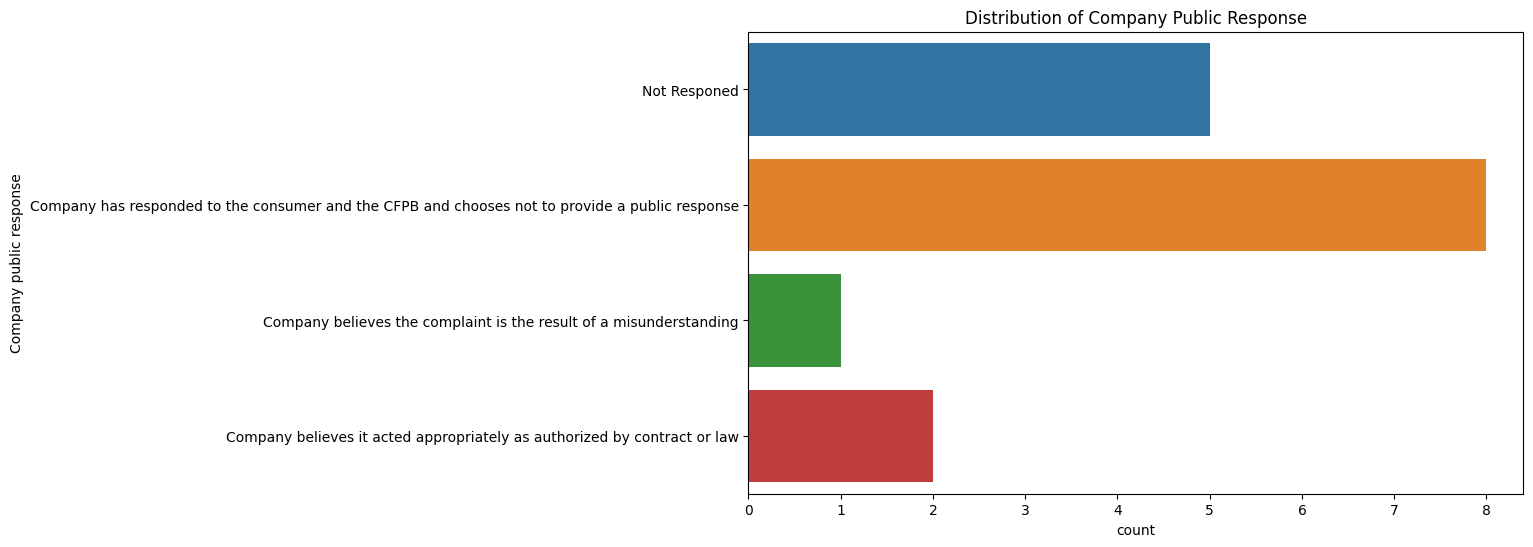

In [25]:


plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Timely response?')
plt.title('Distribution of Timely Response')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Company public response')
plt.title('Distribution of Company Public Response')
plt.show()

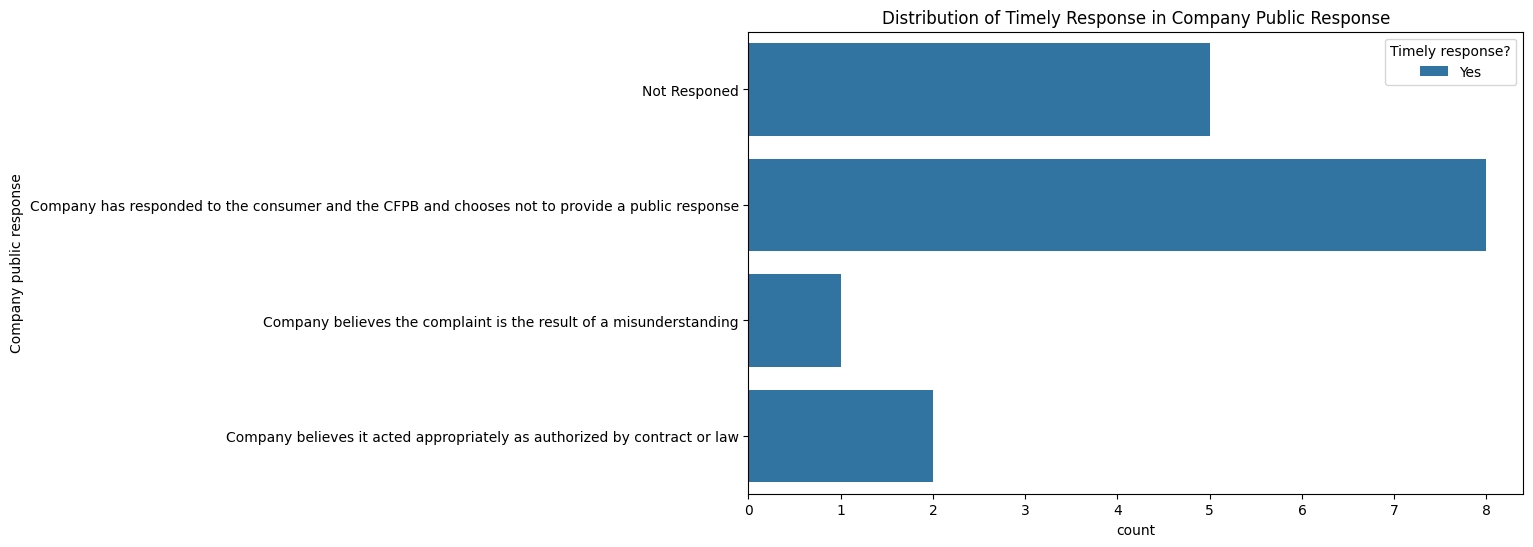

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Company public response', hue='Timely response?')
plt.title('Distribution of Timely Response in Company Public Response')
plt.legend(title='Timely response?')
plt.show()

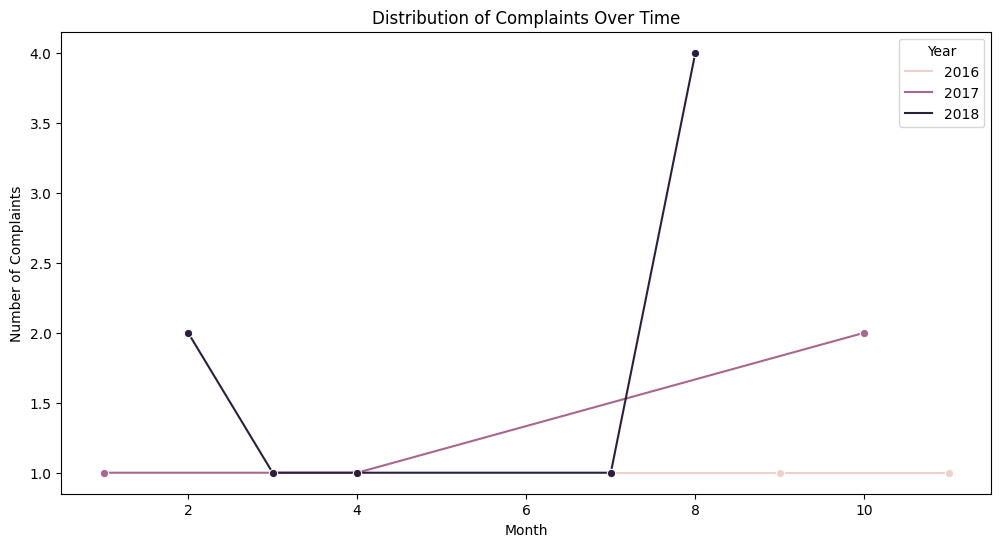

In [27]:
df['Date received'] = pd.to_datetime(df['Date received'])


df['Year'] = df['Date received'].dt.year
df['Month'] = df['Date received'].dt.month


complaints_per_month = df.groupby(['Year', 'Month'])['Date received'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=complaints_per_month, x='Month', y='Date received', hue='Year', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.title('Distribution of Complaints Over Time')
plt.legend(title='Year')
plt.show()

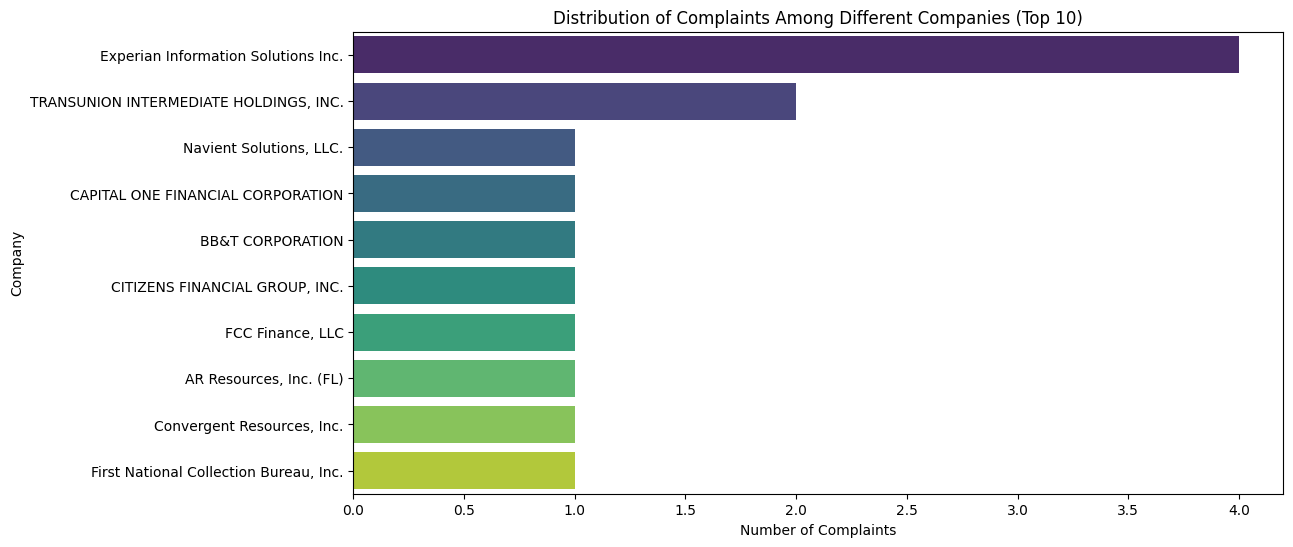

Top companies with the most complaints:
                                  Company  Complaints
0     Experian Information Solutions Inc.           4
1  TRANSUNION INTERMEDIATE HOLDINGS, INC.           2
2                 Navient Solutions, LLC.           1
3       CAPITAL ONE FINANCIAL CORPORATION           1
4                        BB&T CORPORATION           1
5          CITIZENS FINANCIAL GROUP, INC.           1
6                        FCC Finance, LLC           1
7                 AR Resources, Inc. (FL)           1
8              Convergent Resources, Inc.           1
9  First National Collection Bureau, Inc.           1


In [28]:

# Count complaints per company
complaints_per_company = df['Company'].value_counts().reset_index()
complaints_per_company.columns = ['Company', 'Complaints']

# Sort companies by the number of complaints
complaints_per_company = complaints_per_company.sort_values(by='Complaints', ascending=False)

# Plot the distribution of complaints among different companies
plt.figure(figsize=(12, 6))
sns.barplot(data=complaints_per_company.head(10), x='Complaints', y='Company', palette='viridis')
plt.xlabel('Number of Complaints')
plt.ylabel('Company')
plt.title('Distribution of Complaints Among Different Companies (Top 10)')
plt.show()

# Display the companies with the most complaints
top_companies = complaints_per_company.head(10)
print("Top companies with the most complaints:")
print(top_companies)

**Machine Learning Model**





In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Prepare features (X) and target (y)
X = df['Consumer complaint narrative']
y = df['Product']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Support Vector Machine classifier
clf = SVC(kernel='linear', C=5)
clf.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.25
                                                                              precision    recall  f1-score   support

                                                 Credit card or prepaid card       0.00      0.00      0.00         2
Credit reporting, credit repair services, or other personal consumer reports       1.00      1.00      1.00         1
                                                             Debt collection       0.00      0.00      0.00         0
                                                                Student loan       0.00      0.00      0.00         1

                                                                    accuracy                           0.25         4
                                                                   macro avg       0.25      0.25      0.25         4
                                                                weighted avg       0.25      0.25      0.25         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report




X = df['Company']
y = df['Product']  # Replace with your target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.25
                                                                              precision    recall  f1-score   support

                                                 Credit card or prepaid card       0.00      0.00      0.00         2
Credit reporting, credit repair services, or other personal consumer reports       0.33      1.00      0.50         1
                                                                    Mortgage       0.00      0.00      0.00         0
                                                                Student loan       0.00      0.00      0.00         1

                                                                    accuracy                           0.25         4
                                                                   macro avg       0.08      0.25      0.12         4
                                                                weighted avg       0.08      0.25      0.12         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
X = df['Consumer complaint narrative']
y = df['Product']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the models
naive_bayes_clf = MultinomialNB()
naive_bayes_clf.fit(X_train_tfidf, y_train)

svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train_tfidf, y_train)

random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_clf.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the models
naive_bayes_pred = naive_bayes_clf.predict(X_test_tfidf)
svm_pred = svm_clf.predict(X_test_tfidf)
random_forest_pred = random_forest_clf.predict(X_test_tfidf)

naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)

print(f"Naive Bayes Accuracy: {naive_bayes_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Random Forest Accuracy: {random_forest_accuracy:.2f}")

print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test, naive_bayes_pred))

print("\nClassification Report for SVM:")
print(classification_report(y_test, svm_pred))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, random_forest_pred))

Naive Bayes Accuracy: 0.25
SVM Accuracy: 0.25
Random Forest Accuracy: 0.00

Classification Report for Naive Bayes:
                                                                              precision    recall  f1-score   support

                                                 Credit card or prepaid card       0.00      0.00      0.00         2
Credit reporting, credit repair services, or other personal consumer reports       1.00      1.00      1.00         1
                                                             Debt collection       0.00      0.00      0.00         0
                                                                Student loan       0.00      0.00      0.00         1

                                                                    accuracy                           0.25         4
                                                                   macro avg       0.25      0.25      0.25         4
                                                         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

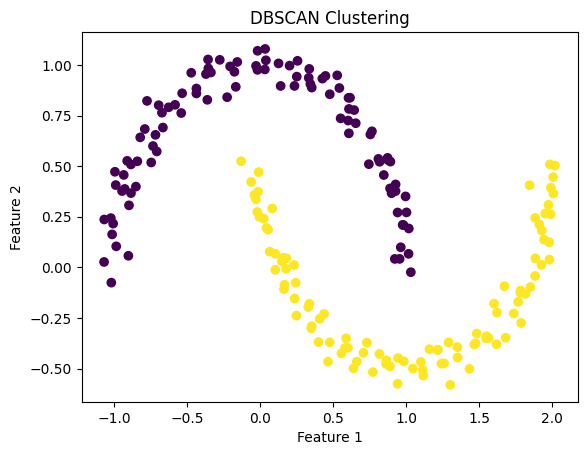

In [34]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate some example data
X, _ = make_moons(n_samples=200, noise=0.05, random_state=0)

# Apply DBSCAN for clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report



# Prepare features (X) and target (y)
X_text = df['Consumer complaint narrative']
y = df['Product']  # Replace with your target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_tfidf.toarray(), y_train)

# Make predictions and evaluate the model
y_pred = gnb.predict(X_test_tfidf.toarray())
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.25
                                                                              precision    recall  f1-score   support

                                                 Credit card or prepaid card       0.00      0.00      0.00         2
Credit reporting, credit repair services, or other personal consumer reports       1.00      1.00      1.00         1
                                                                    Mortgage       0.00      0.00      0.00         0
                                                                Student loan       0.00      0.00      0.00         1

                                                                    accuracy                           0.25         4
                                                                   macro avg       0.25      0.25      0.25         4
                                                                weighted avg       0.25      0.25      0.25         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [36]:
print("Number of missing values in y:", y.isnull().sum())


Number of missing values in y: 0


In [37]:
# Remove rows with missing target values
df = df.dropna(subset=['Consumer disputed?'])

# Update X and y
X_encoded = df.drop(['Consumer disputed?'], axis=1)
y = df['Consumer disputed?'].map({'Yes': 1, 'No': 0})


In [38]:
print("Number of missing values in y:", y.isnull().sum())


Number of missing values in y: 11


In [39]:
# Impute missing target values with the most frequent value
most_frequent_target = y.mode()[0]
y.fillna(most_frequent_target, inplace=True)


In [40]:
print("Number of missing values in y:", y.isnull().sum())


Number of missing values in y: 0


In [49]:
print("X shape:", X_encoded.shape)
print("y shape:", y.shape)


X shape: (27, 681)
y shape: (16,)


In [61]:
# Example of manual data splitting
X_train = X_encoded[:n_train_samples]
X_test = X_encoded[n_train_samples:]
y_train = y[:n_train_samples]
y_test = y[n_train_samples:]


NameError: ignored

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Preprocessing
df['Consumer complaint narrative'].fillna('', inplace=True)
vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(df['Consumer complaint narrative'])
X_categorical = df.drop(['Consumer complaint narrative', 'Consumer disputed?'], axis=1)
X_encoded = pd.concat([X_categorical, pd.DataFrame(X_text.toarray())], axis=1)
y = df['Consumer disputed?'].map({'Yes': 1, 'No': 0})

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


ValueError: ignored

## Problem 1: High Consumer Dispute Rate:

In [71]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Product_encoded'] = label_encoder.fit_transform(df['Product'])


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the text data
X_text_tfidf = vectorizer.fit_transform(df['Consumer complaint narrative'])

# Convert the sparse matrix to a dense array
X_text_tfidf_array = X_text_tfidf.toarray()

# Now X_text_tfidf_array contains the TF-IDF transformed features
